In [58]:
import scanpy as sc
import anndata as ad
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import median_abs_deviation
import numpy as np


In [59]:
# first looking at one sample, just to get a feel for the data (IGNORE)
p1_dir = "/rds/general/user/ztb25/home/PBMC_datasets/1/GSE223138_RAW/16/"

adata1 = sc.read_10x_mtx(
    p1_dir,
    var_names="gene_symbols",
    cache=True
)
adata1.var_names_make_unique()


In [60]:
print(adata1)
# this means we have 12190 cells and 33694 genes in this sample. 

AnnData object with n_obs × n_vars = 12190 × 36601
    var: 'gene_ids', 'feature_types'


In [61]:
display(adata1.obs.head())
display(adata1.var.head()) 

""
AAACCTGAGACTACAA-1
AAACCTGAGAGCTGCA-1
AAACCTGAGATCACGG-1
AAACCTGAGGATTCGG-1
AAACCTGAGGTCGGAT-1


,gene_ids,feature_types
MIR1302-2HG,ENSG00000243485,Gene Expression
FAM138A,ENSG00000237613,Gene Expression
OR4F5,ENSG00000186092,Gene Expression
AL627309.1,ENSG00000238009,Gene Expression
AL627309.3,ENSG00000239945,Gene Expression


In [62]:
pd.DataFrame(
    adata1.X[:10, :20].toarray(),
    index=adata1.obs_names[:10],
    columns=adata1.var_names[:20]
)

,MIR1302-2HG,FAM138A,OR4F5,AL627309.1,AL627309.3,AL627309.2,AL627309.5,AL627309.4,AP006222.2,AL732372.1,OR4F29,AC114498.1,OR4F16,AL669831.2,LINC01409,FAM87B,LINC01128,LINC00115,FAM41C,AL645608.6
AAACCTGAGACTACAA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGAGAGCTGCA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGAGATCACGG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGAGGATTCGG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGAGGTCGGAT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGAGGTGACCA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGCAACGATGG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGCACAACTGT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGCACAGATTC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGCACGTGAGA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
# mitochondrial genes
adata1.var["mt"] = adata1.var_names.str.startswith("MT-") 
# ribosomal genes
adata1.var["ribo"] = adata1.var_names.str.startswith(("RPS", "RPL"))
# hemoglobin genes.
adata1.var["hb"] = adata1.var_names.str.contains("^HB[^(P)]")

In [64]:
sc.pp.calculate_qc_metrics(
    adata1, qc_vars=["mt", "ribo", "hb"], inplace=True, percent_top=[20], log1p=True
)
adata1

AnnData object with n_obs × n_vars = 12190 × 36601
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb'
    var: 'gene_ids', 'feature_types', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'

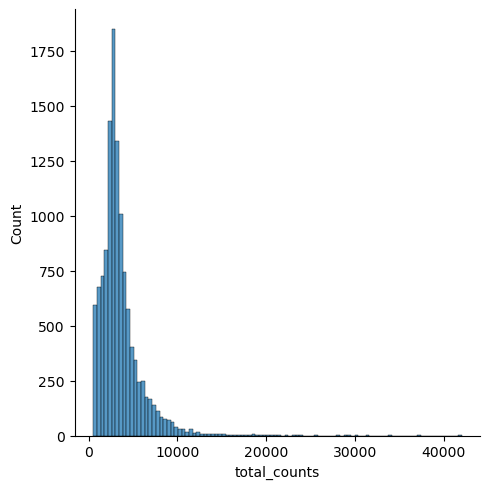

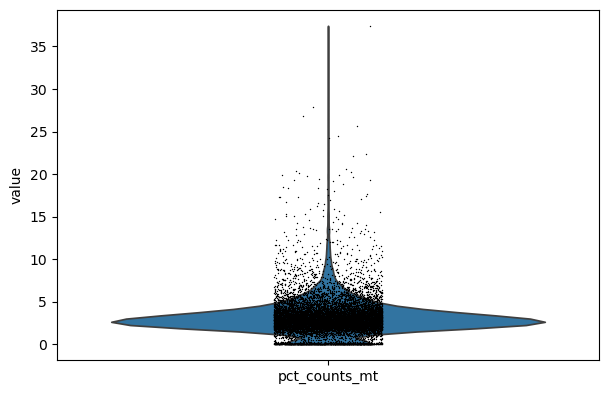

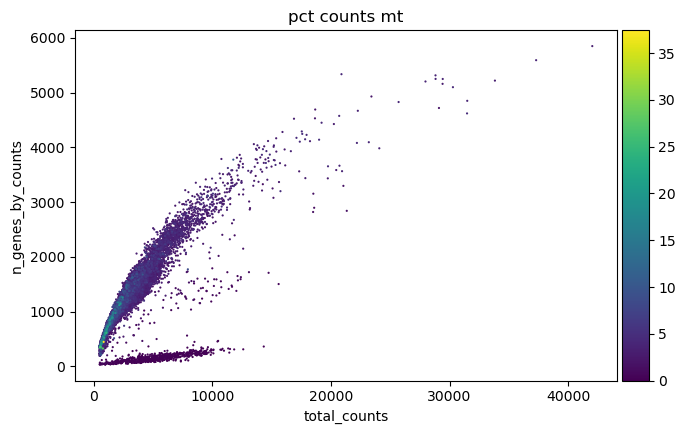

In [65]:
p1 = sns.displot(adata1.obs["total_counts"], bins=100, kde=False)
p2 = sc.pl.violin(adata1, "pct_counts_mt")
p3 = sc.pl.scatter(adata1, "total_counts", "n_genes_by_counts", color="pct_counts_mt")

In [66]:
# Add missing metadata

sample_meta = pd.DataFrame({
    "sample_num": ["16", "17", "19", "20", "25", "26"],
    "gsm_id": ["GSM6940192","GSM6940193","GSM6940194","GSM6940195","GSM6940196","GSM6940197"],
    "diagnosis": ["CTRL", "CTRL", "PD", "PD", "PD", "PD"],
    "age" : [67, 73, 66, 66, 78, 76],
    "gender": ["F", "F", "F", "F", "F", "F"]
}).set_index("sample_num")

In [67]:
import os

In [68]:
# Now doing global QC

# read in samples and create dictionary of anndata objects

samples = {
    "1": "/rds/general/user/ztb25/home/PBMC_datasets/1/GSE223138_RAW/16/",
    "2": "/rds/general/user/ztb25/home/PBMC_datasets/1/GSE223138_RAW/17/",
    "3": "/rds/general/user/ztb25/home/PBMC_datasets/1/GSE223138_RAW/19/",
    "4": "/rds/general/user/ztb25/home/PBMC_datasets/1/GSE223138_RAW/20/",
    "5": "/rds/general/user/ztb25/home/PBMC_datasets/1/GSE223138_RAW/25/",
    "6": "/rds/general/user/ztb25/home/PBMC_datasets/1/GSE223138_RAW/26/",

}

adatas = {}
for name, path in samples.items():
    adata = sc.read_10x_mtx(path, var_names="gene_symbols", cache=False)
    adata.var_names_make_unique()

    # extract sample number from folder path (e.g., "16" from ".../16/")
    sample_num = os.path.basename(os.path.normpath(path))

    # lookup metadata row for this sample
    meta_row = sample_meta.loc[sample_num]
    adata.obs["gsm_id"] = meta_row["gsm_id"]
    adata.obs["diagnosis"] = meta_row["diagnosis"]
    adata.obs["age"] = meta_row["age"]
    adata.obs["gender"] = meta_row["gender"]
    adatas[name] = adata

In [69]:
adatas

{'1': AnnData object with n_obs × n_vars = 12190 × 36601
     obs: 'gsm_id', 'diagnosis', 'age', 'gender'
     var: 'gene_ids', 'feature_types',
 '2': AnnData object with n_obs × n_vars = 8721 × 36601
     obs: 'gsm_id', 'diagnosis', 'age', 'gender'
     var: 'gene_ids', 'feature_types',
 '3': AnnData object with n_obs × n_vars = 15268 × 36601
     obs: 'gsm_id', 'diagnosis', 'age', 'gender'
     var: 'gene_ids', 'feature_types',
 '4': AnnData object with n_obs × n_vars = 9838 × 36601
     obs: 'gsm_id', 'diagnosis', 'age', 'gender'
     var: 'gene_ids', 'feature_types',
 '5': AnnData object with n_obs × n_vars = 10470 × 36601
     obs: 'gsm_id', 'diagnosis', 'age', 'gender'
     var: 'gene_ids', 'feature_types',
 '6': AnnData object with n_obs × n_vars = 10339 × 36601
     obs: 'gsm_id', 'diagnosis', 'age', 'gender'
     var: 'gene_ids', 'feature_types'}

In [70]:
# merge samples into one anndata object

adata = ad.concat(adatas, label="sample", merge= "same")
adata.obs_names_make_unique()
adata


/rds/general/user/ztb25/home/miniforge3/envs/m10/lib/python3.11/site-packages/anndata/_core/anndata.py:1796: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 66826 × 36601
    obs: 'gsm_id', 'diagnosis', 'age', 'gender', 'sample'
    var: 'gene_ids', 'feature_types'

In [71]:
display(adata.var.head())
display(adata.obs.head())

,gene_ids,feature_types
MIR1302-2HG,ENSG00000243485,Gene Expression
FAM138A,ENSG00000237613,Gene Expression
OR4F5,ENSG00000186092,Gene Expression
AL627309.1,ENSG00000238009,Gene Expression
AL627309.3,ENSG00000239945,Gene Expression


,gsm_id,diagnosis,age,gender,sample
AAACCTGAGACTACAA-1,GSM6940192,CTRL,67,F,1
AAACCTGAGAGCTGCA-1,GSM6940192,CTRL,67,F,1
AAACCTGAGATCACGG-1,GSM6940192,CTRL,67,F,1
AAACCTGAGGATTCGG-1,GSM6940192,CTRL,67,F,1
AAACCTGAGGTCGGAT-1,GSM6940192,CTRL,67,F,1


In [72]:
# Run QC globally

# Annotate mitochondrial genes
adata.var["mt"] = adata.var_names.str.startswith("MT-")  

sc.pp.calculate_qc_metrics(
    adata,
    qc_vars=["mt"], # should i do ribo and hb here as well?
    percent_top=[20],
    log1p=True,
    inplace=True
)

adata # to check new metadata cols

AnnData object with n_obs × n_vars = 66826 × 36601
    obs: 'gsm_id', 'diagnosis', 'age', 'gender', 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'

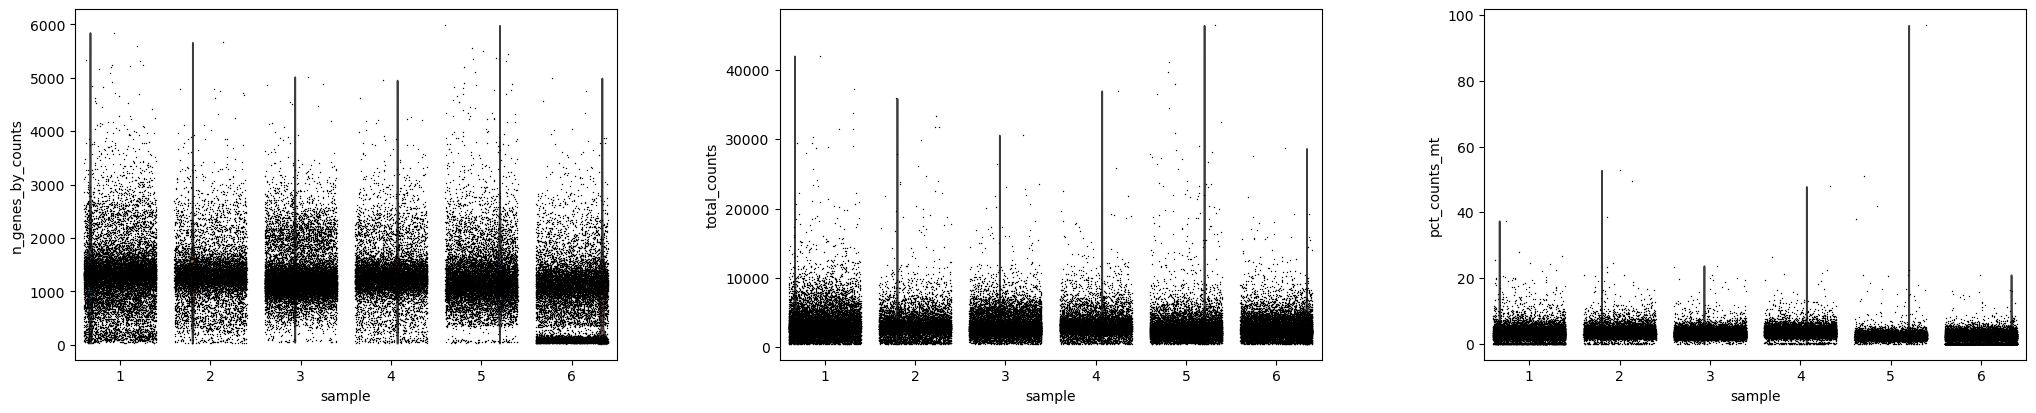

In [73]:
sc.pl.violin(
    adata,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    groupby="sample",
    jitter=0.4,
    multi_panel=True
)

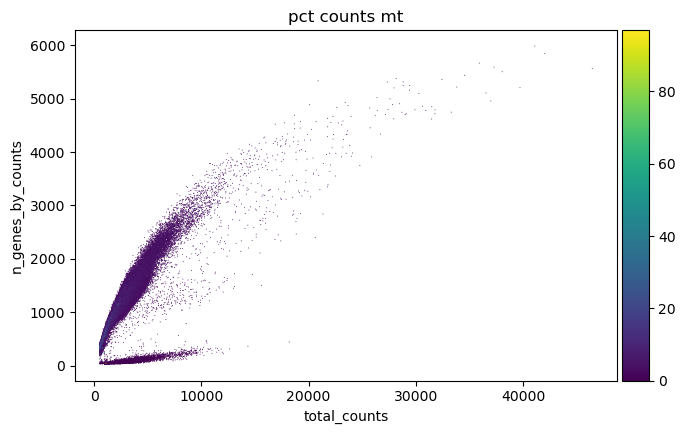

In [74]:
p1 = sc.pl.scatter(adata, "total_counts", "n_genes_by_counts", color="pct_counts_mt")

In [75]:
adata.obs.head()

,gsm_id,diagnosis,age,gender,sample,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_20_genes,total_counts_mt,log1p_total_counts_mt,pct_counts_mt
AAACCTGAGACTACAA-1,GSM6940192,CTRL,67,F,1,3230,8.080547,12623.0,9.443355,17.507724,434.0,6.075346,3.438168
AAACCTGAGAGCTGCA-1,GSM6940192,CTRL,67,F,1,828,6.720220,1370.0,7.223296,21.678832,168.0,5.129899,12.262774
AAACCTGAGATCACGG-1,GSM6940192,CTRL,67,F,1,1275,7.151485,2321.0,7.750184,19.603619,70.0,4.262680,3.015941
AAACCTGAGGATTCGG-1,GSM6940192,CTRL,67,F,1,1763,7.475339,4620.0,8.438366,20.259740,183.0,5.214936,3.961039
AAACCTGAGGTCGGAT-1,GSM6940192,CTRL,67,F,1,1338,7.199678,2828.0,7.947679,19.519095,91.0,4.521789,3.217822


In [76]:
# group by sample (to avoid skewing from bad samples) and flag outliers based on median absolute deviation (MAD).
def is_outlier_per_sample(adata, metric: str, nmads: int):
    outlier = pd.Series(False, index=adata.obs_names)
    
    for sample, group in adata.obs.groupby("sample"):
        M = group[metric]
        is_out = (M < np.median(M) - nmads * median_abs_deviation(M)) | (
            np.median(M) + nmads * median_abs_deviation(M) < M
        )
        outlier[is_out.index] = is_out
    
    return outlier


In [77]:
adata.obs["outlier"] = (
    is_outlier_per_sample(adata, "log1p_total_counts", 5) # log values easier to visalise and compare (raw total_counts can vary hugely across cells)
    | is_outlier_per_sample(adata, "log1p_n_genes_by_counts", 5)
    | is_outlier_per_sample(adata, "pct_counts_in_top_20_genes", 5) # gives what percentage of total counts comes from the top 20 most highly expressed genes, cells with very high values here are likely to be low quality cells where a few genes dominate the expression profile, which can be a sign of cell stress or damage
)
adata.obs.outlier.value_counts()

outlier
False    59357
True      7469
Name: count, dtype: int64

In [78]:
adata.obs["mt_outlier"] = is_outlier_per_sample(adata, "pct_counts_mt", 3) | (
    adata.obs["pct_counts_mt"] > 8
)
adata.obs.mt_outlier.value_counts()

mt_outlier
False    60946
True      5880
Name: count, dtype: int64

In [79]:
# filter out low quality cells, and check how many cells before and after filtering (save for later dataframe)
cells_before = adata.n_obs
cells_per_sample_before = adata.obs.groupby('sample').size().rename("cells_before_qc")
n_samples = adata.obs["sample"].nunique()

print(f"Total number of cells: {cells_before}")
print(f"Number of cells per sample before filtering:\n{cells_per_sample_before}")

adata = adata[(~adata.obs.outlier) & (~adata.obs.mt_outlier)].copy()
cells_per_sample_after_filtering = adata.obs.groupby("sample").size().rename("cells_after_lowq_qc")

print(f"Total number of cells after filtering of low quality cells: {adata.n_obs}")
print(f"Number of cells per sample after filtering:\n{cells_per_sample_after_filtering}") #intermediate measure just to see (maybe remove), final dataframe will only have final before/after numbers

Total number of cells: 66826
Number of cells per sample before filtering:
sample
1    12190
2     8721
3    15268
4     9838
5    10470
6    10339
Name: cells_before_qc, dtype: int64
Total number of cells after filtering of low quality cells: 55492
Number of cells per sample after filtering:
sample
1     9885
2     7209
3    13242
4     8408
5     9422
6     7326
Name: cells_after_lowq_qc, dtype: int64


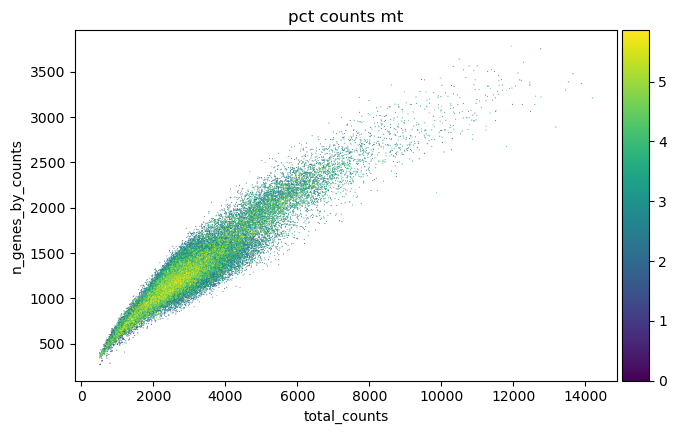

In [80]:
p1 = sc.pl.scatter(adata, "total_counts", "n_genes_by_counts", color="pct_counts_mt")

In [81]:
# doublet detection

sc.pp.scrublet(adata, expected_doublet_rate=0.05, threshold=0.25, batch_key="sample")

In [82]:
# inspect new metadata cols and number of predicted doublets 
display(adata.obs[['doublet_score','predicted_doublet']])
adata.obs['predicted_doublet'].value_counts()

,doublet_score,predicted_doublet
AAACCTGAGACTACAA-1,0.036795,False
AAACCTGAGATCACGG-1,0.017806,False
AAACCTGAGGATTCGG-1,0.113106,False
AAACCTGAGGTCGGAT-1,0.493333,True
AAACCTGAGGTGACCA-1,0.035844,False
...,...,...
TTTGTCAGTTGATTCG-1,0.030200,False
TTTGTCAGTTTGTTTC-1,0.039643,False
TTTGTCATCAAGATCC-1,0.159059,False
TTTGTCATCAGATAAG-1,0.060507,False


predicted_doublet
False    53854
True      1638
Name: count, dtype: int64

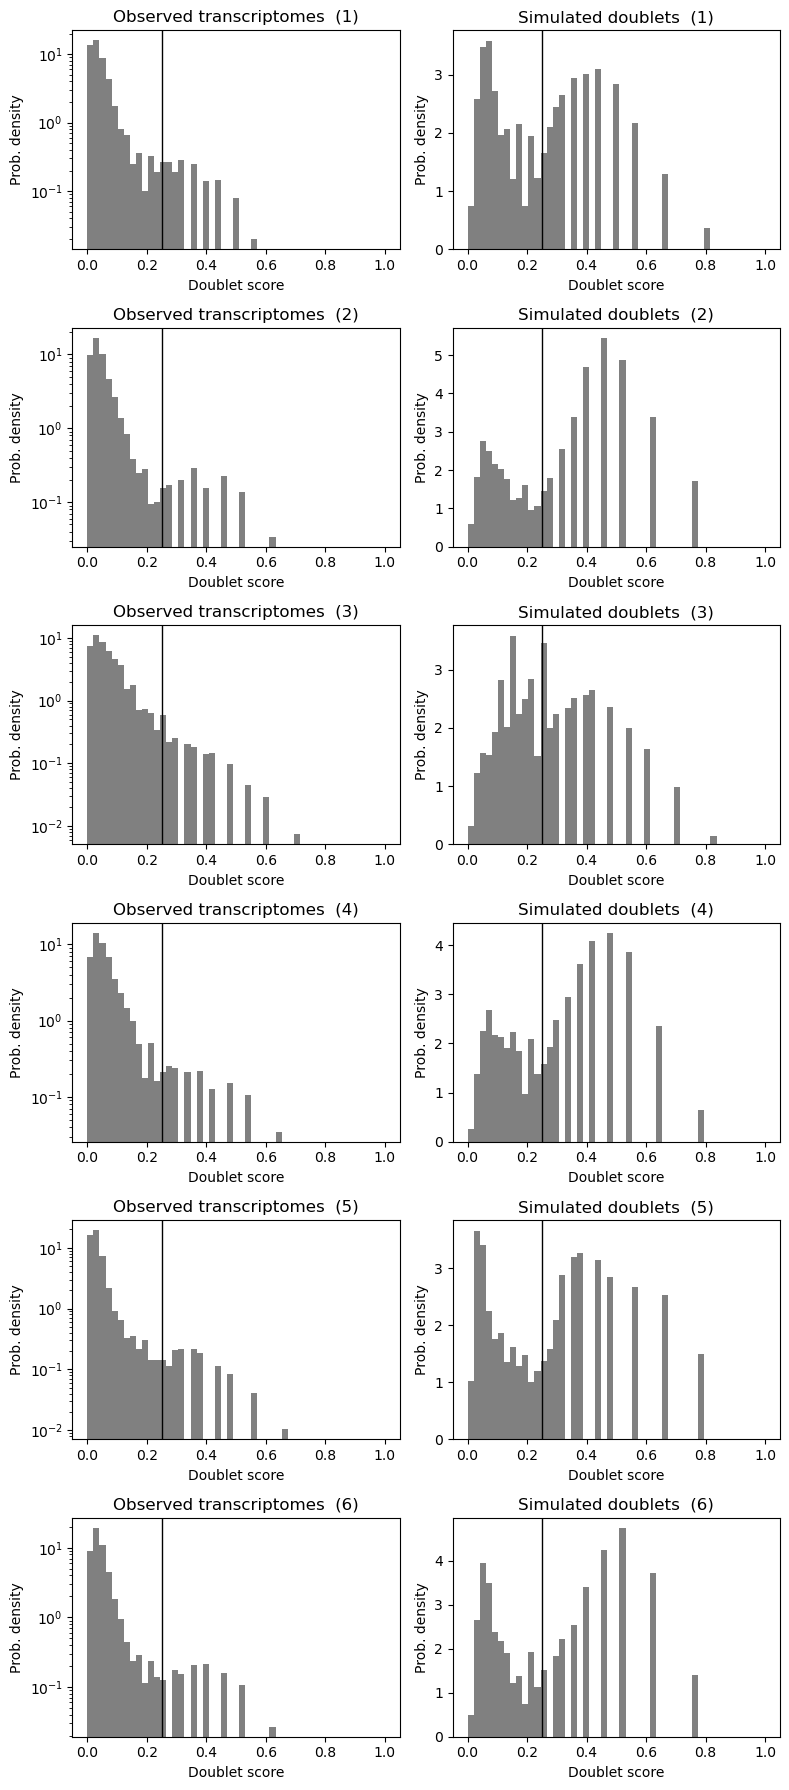

In [83]:
sc.pp.scrublet_simulate_doublets(adata)
sc.pl.scrublet_score_distribution(adata)

In [84]:
# per sample predicted doublets
doublets_predicted = (adata.obs.groupby("sample")["predicted_doublet"].sum().astype(int).rename("doublets_predicted"))

In [85]:
# Filter out doublets

adata = adata[~adata.obs['predicted_doublet']].copy() # should I leave these in for now and inspect them more closely later? 

In [86]:
cells_per_sample_after = adata.obs.groupby("sample").size().rename("cells_after_qc")
total_cells_after = adata.n_obs

In [87]:
# Save dataset

ad.settings.allow_write_nullable_strings = True
adata.write("/rds/general/user/ztb25/home/PBMC_datasets/1/QC_rawcounts.h5ad")

In [88]:
# create and export summary table of number of samples/cells per sample before and after filtering

summary_table = pd.concat(
    [
    cells_per_sample_before, 
    # doublets_predicted,
    cells_per_sample_after
    ],
    axis=1
).astype(int)

# derive removal columns
summary_table["removed_cells"] = (summary_table["cells_before_qc"] - summary_table["cells_after_qc"])
summary_table["pct_removed"] = (
    100 * summary_table["removed_cells"] / summary_table["cells_before_qc"]
).round(2)

summary_table = summary_table.reset_index()  # makes "sample" a normal column

# add diagnosis 
diag_map = adata.obs[["sample", "diagnosis"]].drop_duplicates()
summary_table = summary_table.merge(diag_map, on="sample", how="left")

total_row = pd.DataFrame([{
    "sample": "TOTAL",
    "cells_before_qc": summary_table["cells_before_qc"].sum(),
    # "doublets_predicted": summary_table["doublets_predicted"].sum(),
    "cells_after_qc": summary_table["cells_after_qc"].sum(),
    "removed_cells": summary_table["removed_cells"].sum(),
    "pct_removed": round(
        100 * summary_table["removed_cells"].sum() / summary_table["cells_before_qc"].sum(), 2
    )
}])

summary_table = pd.concat([summary_table, total_row], axis=0, ignore_index=True)

#reorder columns
summary_table = summary_table[
    ["sample", "diagnosis", "cells_before_qc", "cells_after_qc", "removed_cells", "pct_removed"]
]

summary_table.to_csv("/rds/general/user/ztb25/home/PBMC_datasets/1/QC_summary_table.csv", index=False)

In [89]:
summary_table # fix column names maybe

,sample,diagnosis,cells_before_qc,cells_after_qc,removed_cells,pct_removed
0,1,CTRL,12190,9554,2636,21.62
1,2,CTRL,8721,7008,1713,19.64
2,3,PD,15268,12808,2460,16.11
3,4,PD,9838,8141,1697,17.25
4,5,PD,10470,9192,1278,12.21
5,6,PD,10339,7151,3188,30.83
6,TOTAL,NaN,66826,53854,12972,19.41
